In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
#Reading the data set
leads=pd.read_csv(r'S:\PG\DS\ML\Lead Scoring Assignment\Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
leads.shape

(9240, 37)

In [11]:
#Reading the data dictionary
word=pd.read_excel(r'S:\PG\DS\ML\Lead Scoring Assignment\Leads Data Dictionary.xlsx')
word.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...


In [13]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
pd.set_option('display.max_colwidth', None)
word.drop('Unnamed: 0',inplace=True,axis=1)
word.columns = word.iloc[1]
word = word.iloc[2:]
word.reset_index(drop=True, inplace=True)
word.head(len(word))

1,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


In [17]:
#Columns that are now generated after we call the data dictionary are removed.
leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index',
           'Asymmetrique Activity Score','Asymmetrique Profile Score',
           'Tags','Lead Quality','Lead Profile'], axis=1, inplace = True)

### Duplicate check

In [20]:
# Checking for duplicates and dropping the entire duplicate row if any
leads_dub = leads.copy()
leads_dub.drop_duplicates(subset=None, inplace=True)
leads_dub.shape

(9240, 30)

the data shape is same even after running the duplicate drop, hence we can conclude that there are no duplicates

In [23]:
#Droping the unwanted columns
leads=leads.drop('Prospect ID', axis=1)

In [25]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [27]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [29]:
leads.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

### Data Cleaning

In [32]:
leads= leads.replace('Select', np.nan)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [34]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [36]:
# we will drop the columns having more than 60% NA values.
leads=leads.drop(leads.loc[:,list(round(100*(leads.isnull().sum()/len(leads.index)), 2)>60)].columns, axis=1)

In [38]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [40]:
#dropping Lead Number since it has all unique values
leads.drop(['Lead Number'], axis=1, inplace = True)

In [42]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [44]:
leads.City.value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [46]:
leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

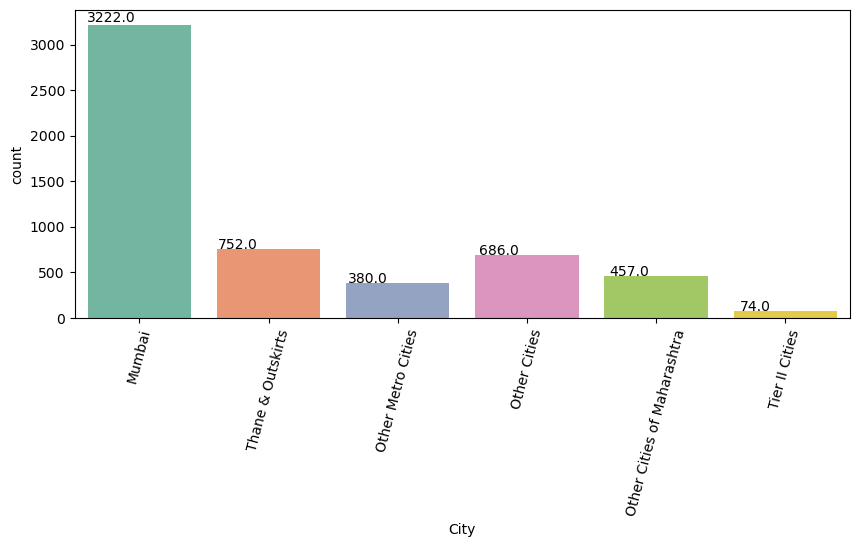

In [48]:
plt.figure(figsize = (10,4))
ax= sns.countplot(x='City', data=leads, orient='h', palette='Set2')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 75)
plt.show()

In [49]:
# Around 57.8% of the data available  is Mumbai so we can impute Mumbai in the missing values.

leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

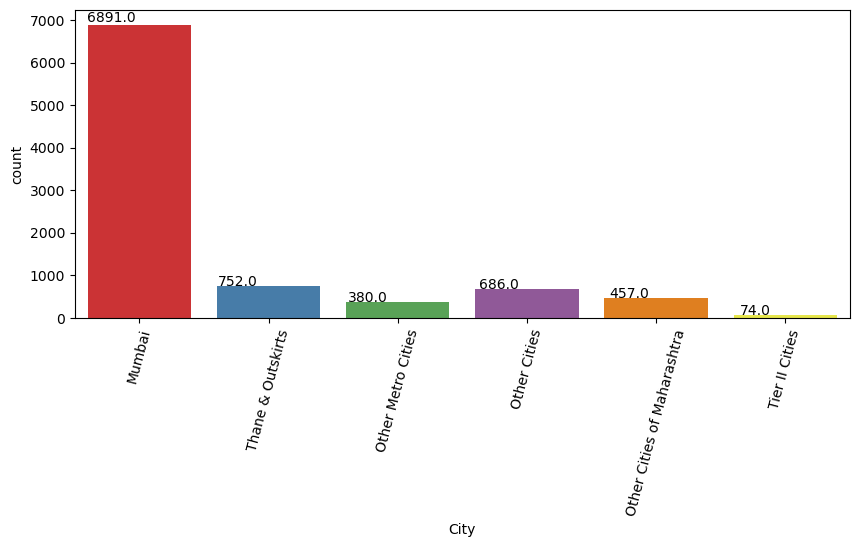

In [52]:
plt.figure(figsize = (10,4))
ax= sns.countplot(x='City', data=leads, orient='h', palette='Set1')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 75)
plt.show()

In [54]:
# now checking Specialization
leads.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [56]:
leads.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

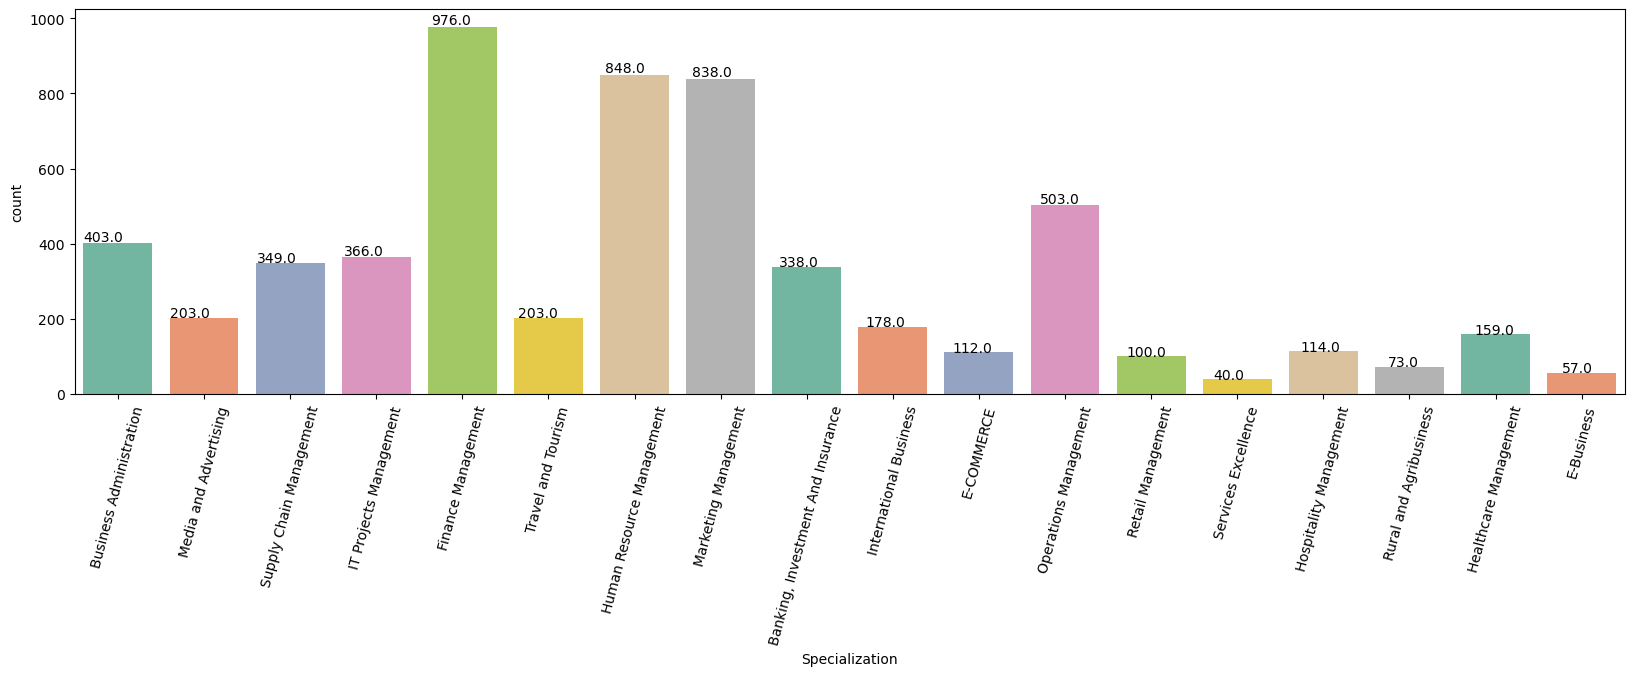

In [58]:
plt.figure(figsize = (20,5))
ax= sns.countplot(x='Specialization', data=leads, orient='h', palette='Set2')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 75)
plt.show()

In [59]:
# if his/her option is not availabe on the list,It maybe the case that lead has not entered any specialization.
# Hence we can make a category "Others" for missing values. 

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

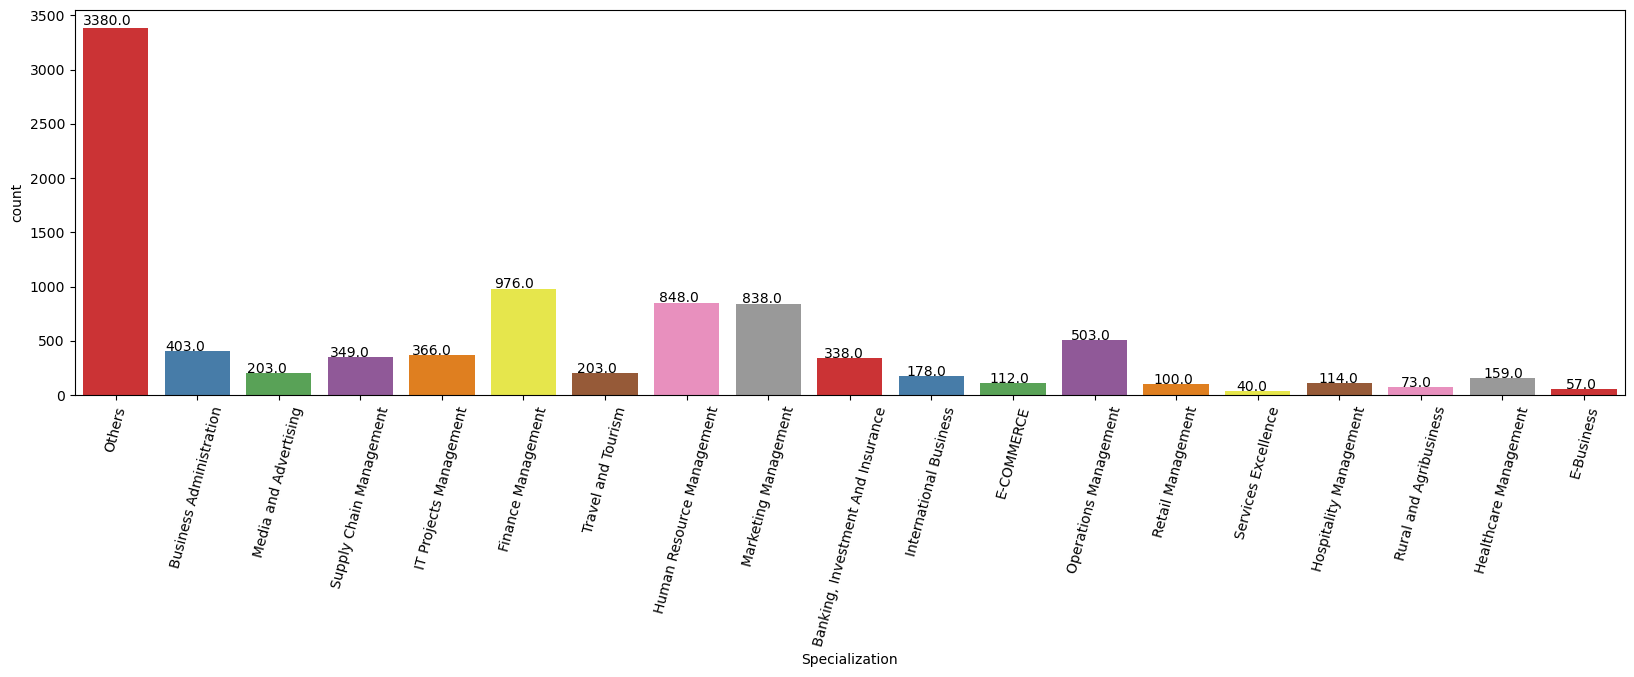

In [62]:
plt.figure(figsize = (20,5))
ax= sns.countplot(x='Specialization', data=leads, orient='h', palette='Set1')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 75)
plt.show()

In [63]:
#Now checking the 'What matters most to you in choosing a course'

leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [64]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

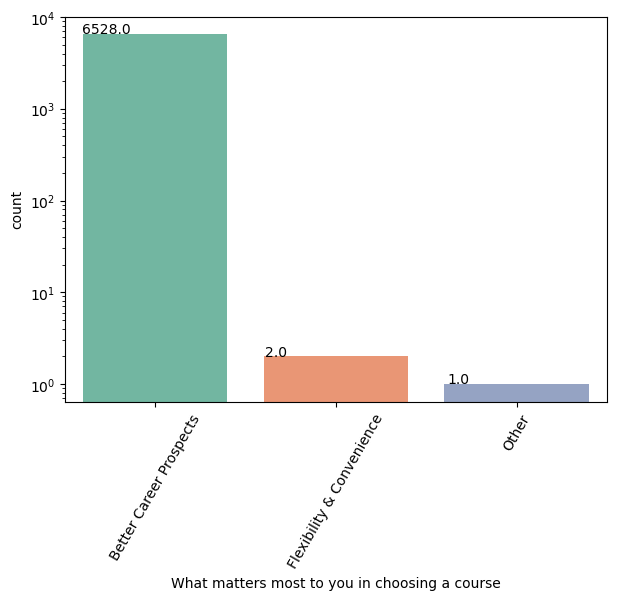

In [68]:
plt.figure(figsize = (7,5))
ax= sns.countplot(x='What matters most to you in choosing a course', data=leads, orient='h', palette='Set2')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 60)
ax.set_yscale('log')
plt.show()

In [69]:
# Blanks in the this column may be imputed by 'Better Career Prospects'.
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

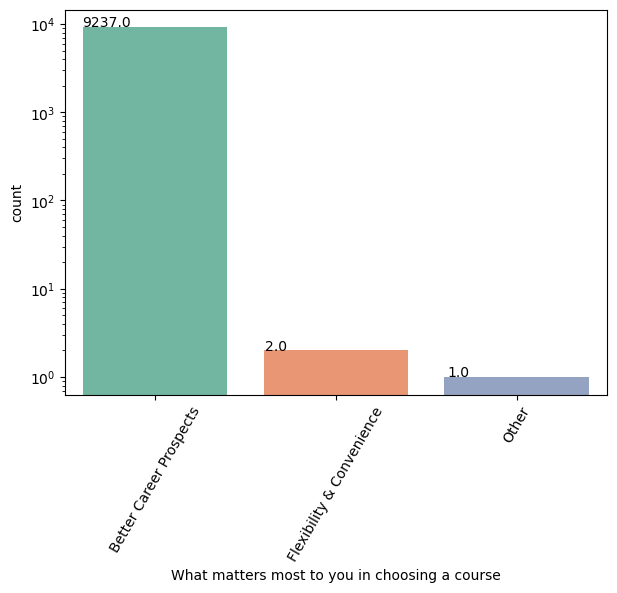

In [72]:
plt.figure(figsize = (7,5))
ax= sns.countplot(x='What matters most to you in choosing a course', data=leads, orient='h', palette='Set2')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 60)
ax.set_yscale('log')
plt.show()

In [73]:
#Now checking the 'What is your current occupation'
leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [76]:
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

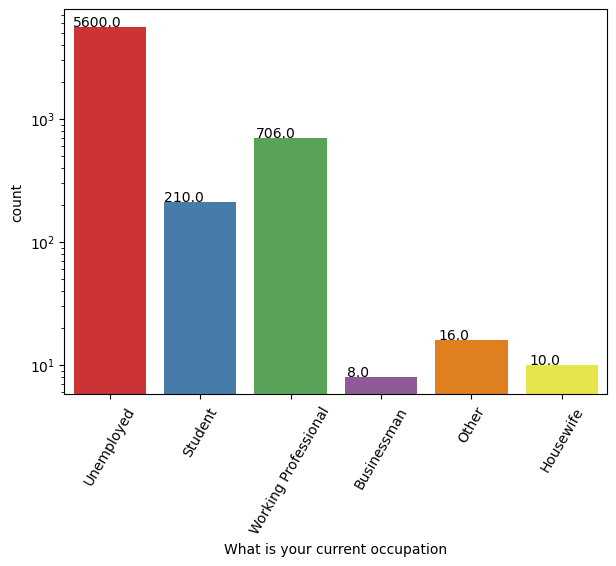

In [78]:
plt.figure(figsize = (7,5))
ax= sns.countplot(x='What is your current occupation', data=leads, orient='h', palette='Set1')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 60)
ax.set_yscale('log')
plt.show()

In [79]:
#86% are unemployeed, so imputing the values with 'Unemployed'
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

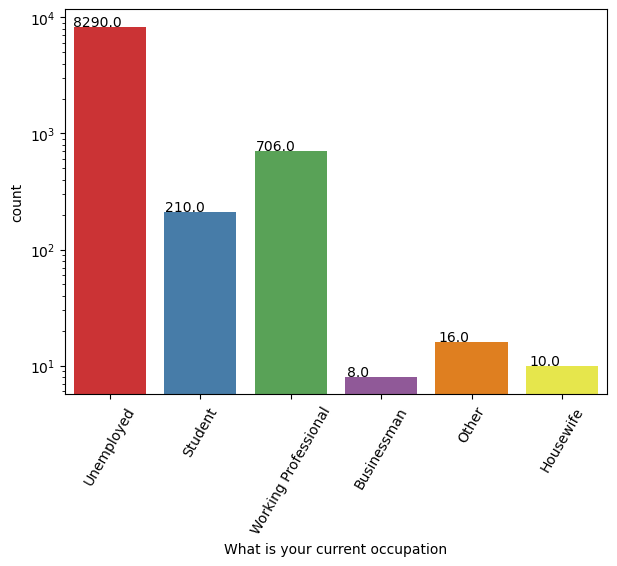

In [82]:
plt.figure(figsize = (7,5))
ax= sns.countplot(x='What is your current occupation', data=leads, orient='h', palette='Set1')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 60)
ax.set_yscale('log')
plt.show()

In [83]:
#Now checking the 'country'
leads['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [86]:
leads['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

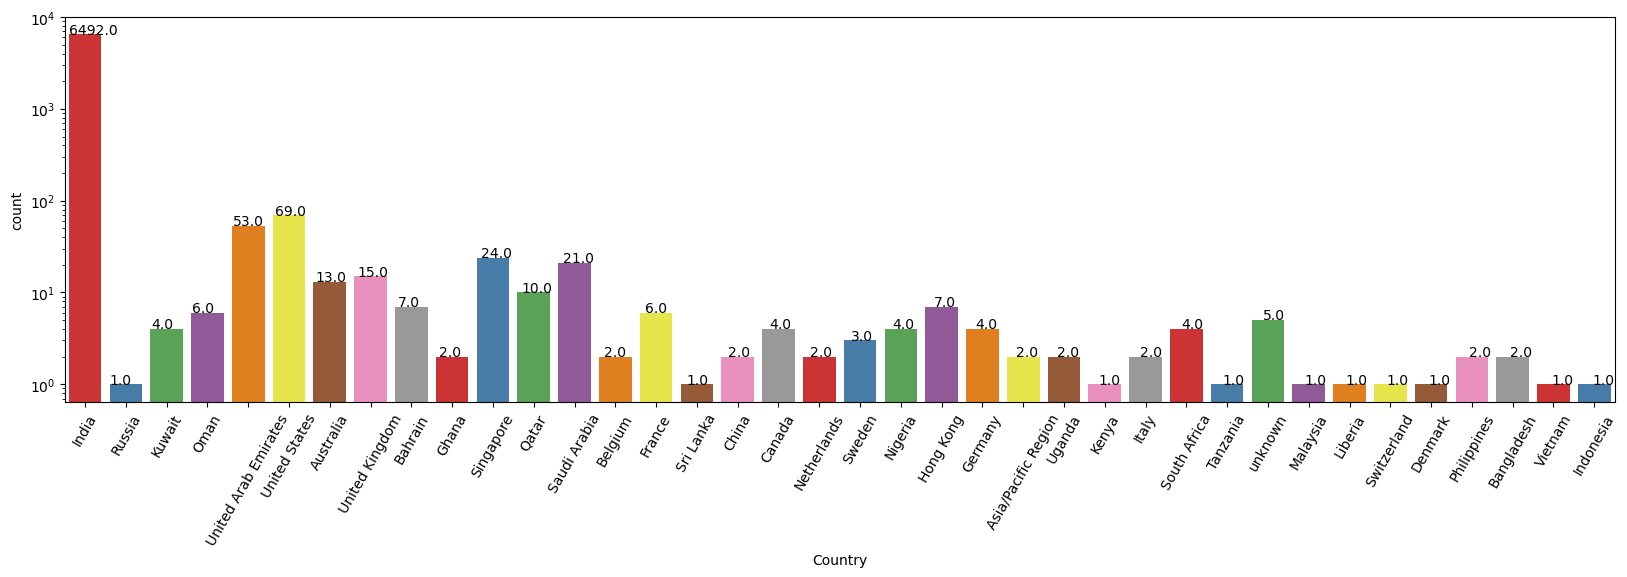

In [88]:
plt.figure(figsize = (20,5))
ax= sns.countplot(x='Country', data=leads, orient='h', palette='Set1')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 60)
ax.set_yscale('log')
plt.show()

In [89]:
# as most of the values are from India, imputing the same to the missing values
leads['Country'] = leads['Country'].replace(np.nan, 'India')

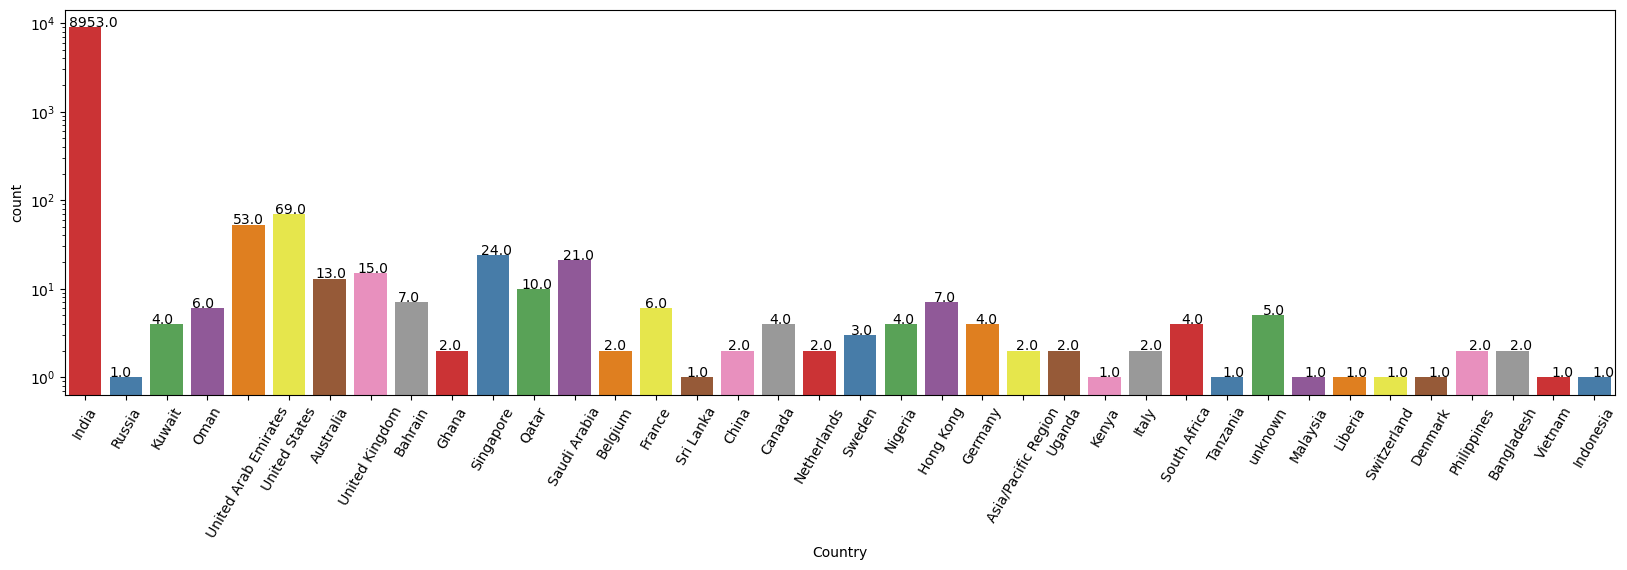

In [90]:
plt.figure(figsize = (20,5))
ax= sns.countplot(x='Country', data=leads, orient='h', palette='Set1')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 60)
ax.set_yscale('log')
plt.show()

In [93]:
#checking the missing values
leads.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                         

### as the rest of the missing/null values are less than 2%, dropping them

In [95]:
leads.dropna(inplace=True)

In [96]:
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [98]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

## Exploratory Data Analytics 

### Univariate Analysis

In [105]:
Converted = round((sum(leads['Converted'])/len(leads['Converted'].index))*100,2)

print("We have almost {} %  Converted rate".format(Converted))

We have almost 37.86 %  Converted rate


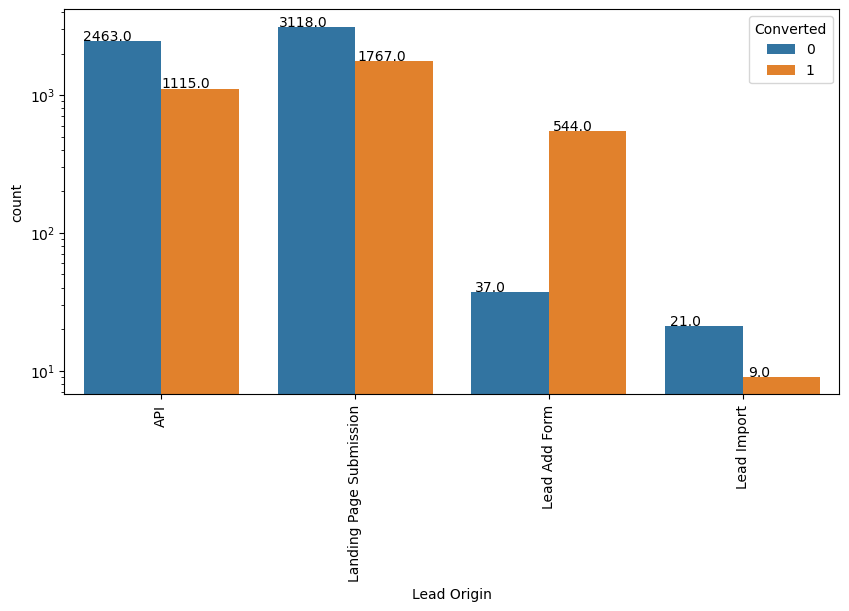

In [107]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Origin", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.

- To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

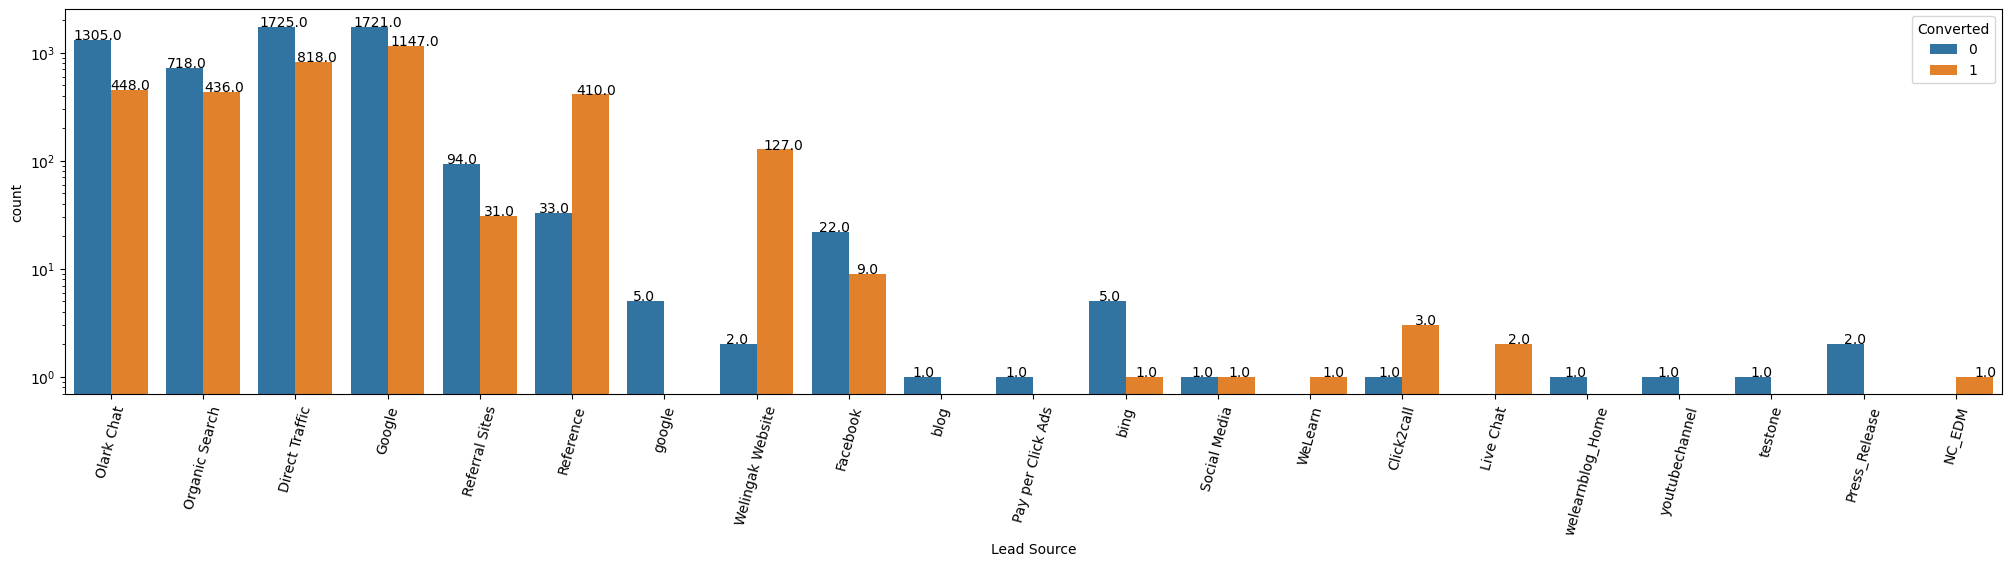

In [111]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 75)
ax.set_yscale('log')
plt.show()

In [112]:
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

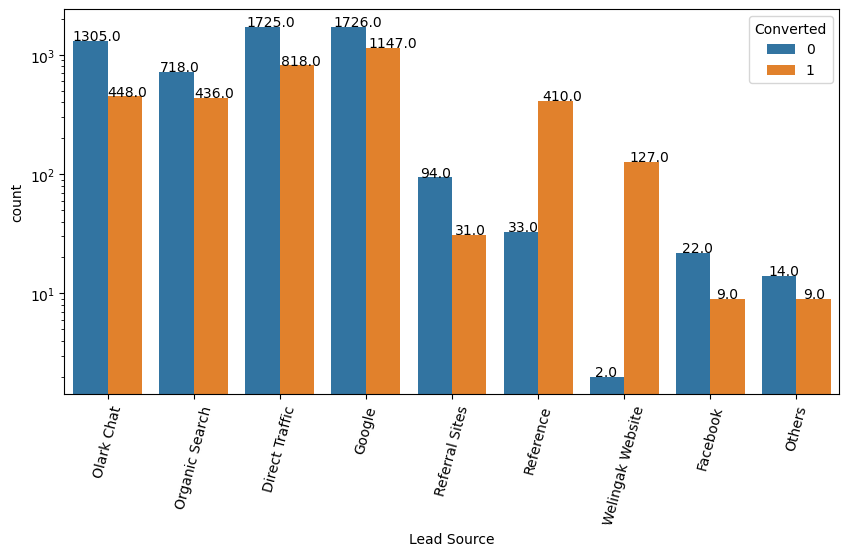

In [113]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 75)
ax.set_yscale('log')
plt.show()

- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.

- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

#### Do Not Email & Do Not Call

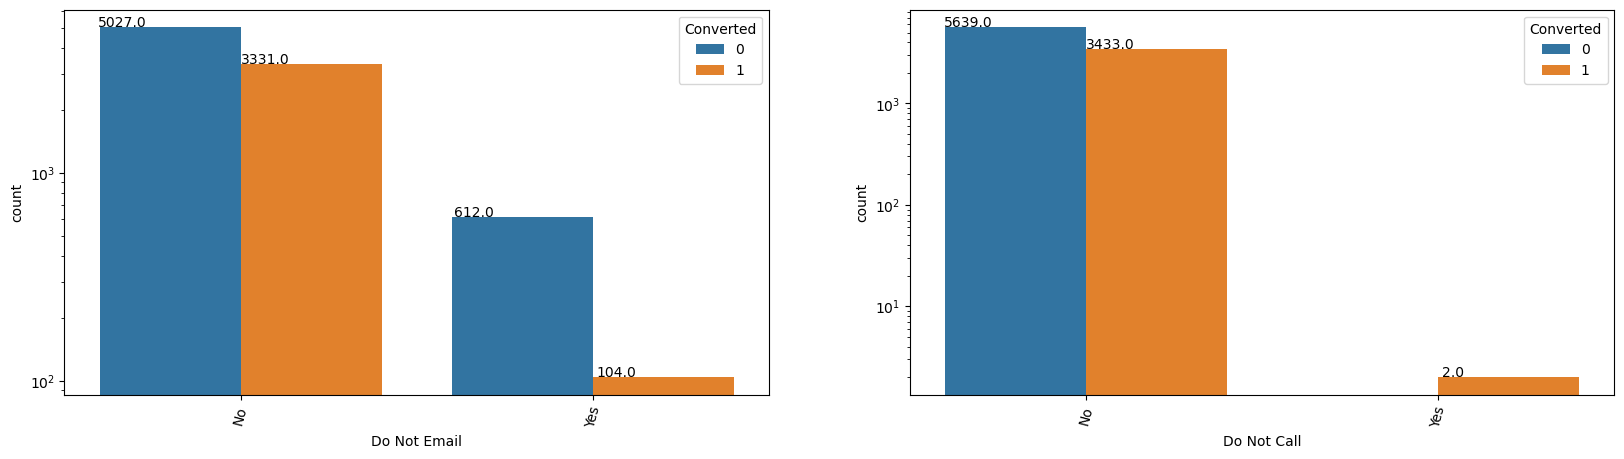

In [120]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
ax= sns.countplot(x = "Do Not Email", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 75)
ax.set_yscale('log')
plt.subplot(1,2,2)
ax= sns.countplot(x = "Do Not Call", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 75)
ax.set_yscale('log')
plt.show()

In [121]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

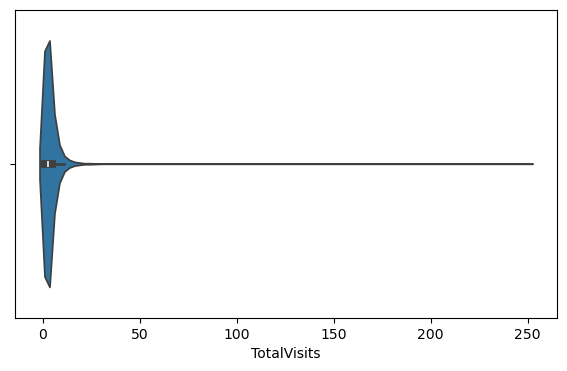

In [122]:
plt.figure(figsize = (7,4))
sns.violinplot(x='TotalVisits', data=leads)
plt.show()

In [126]:
#We are capping the outliers to 95% value for analysis.
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

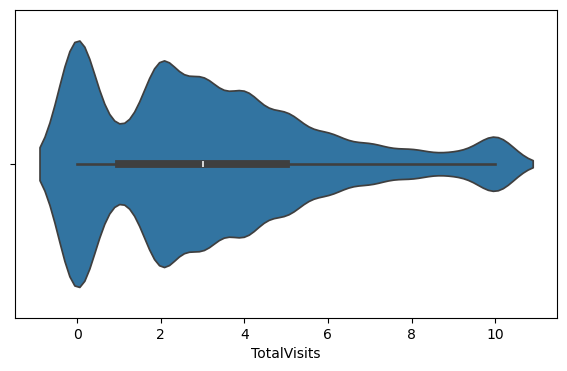

In [128]:
plt.figure(figsize = (7,4))
sns.violinplot(x='TotalVisits', data=leads)
plt.show()

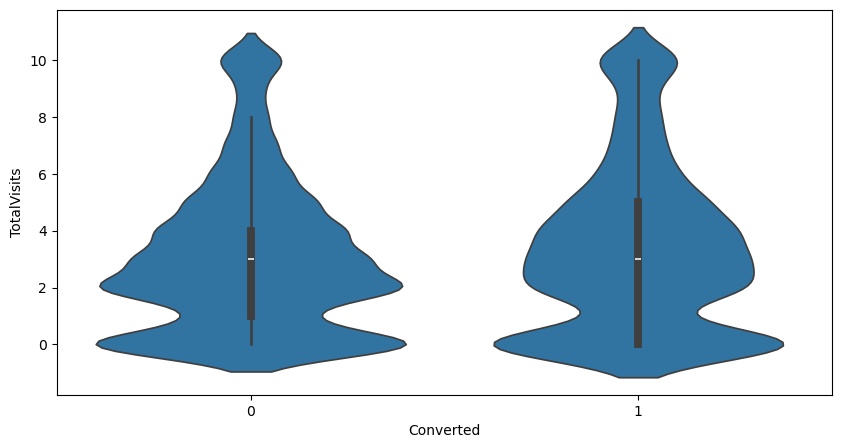

In [130]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

- nothing can be concluded from the total visits

In [133]:
leads['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

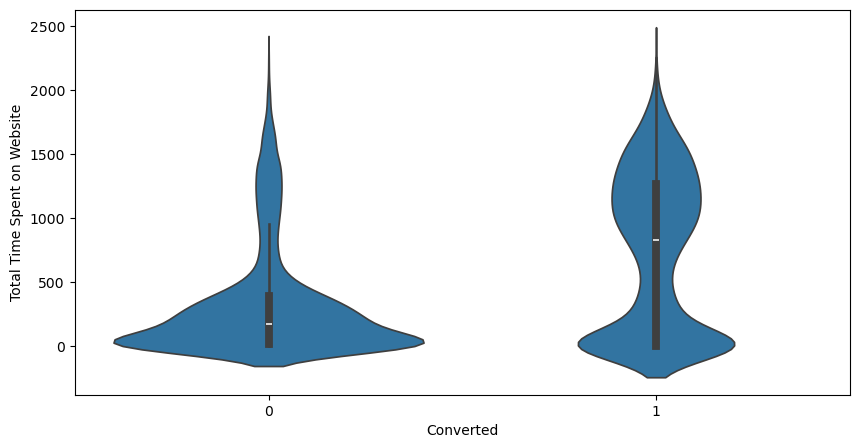

In [135]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

- Website should be more engaging to make leads spend more time on the site as the more time spend by the leads on the site has higher conversion rate
 

In [138]:
leads['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [140]:
leads['Last Activity'].value_counts()

Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

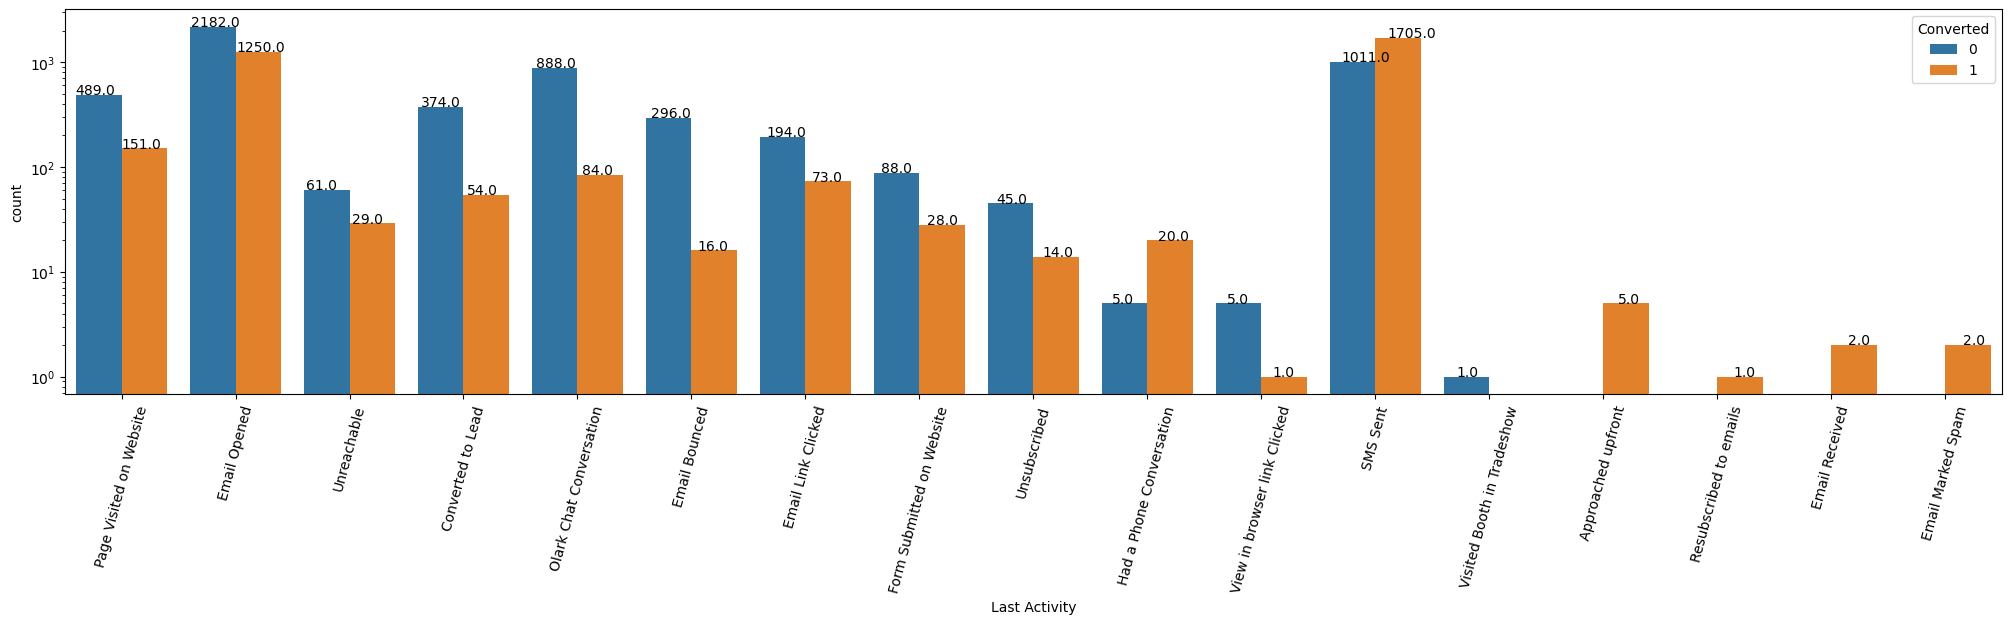

In [142]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 75)
ax.set_yscale('log')
plt.show()

In [143]:
leads.shape

(9074, 27)

In [144]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                      'Other_Activity')

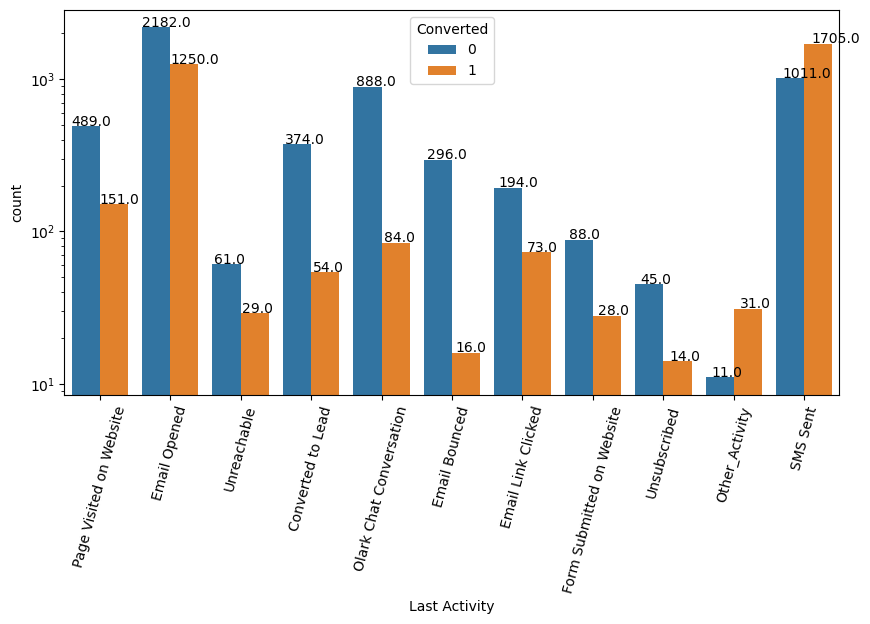

In [148]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 75)
ax.set_yscale('log')
plt.show()

- Most of the lead have their Email opened as their last activity.
- 
Conversion rate for leads with last activity as SMS Sent is almost 62%.

In [151]:
leads.Country.value_counts()

Country
India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

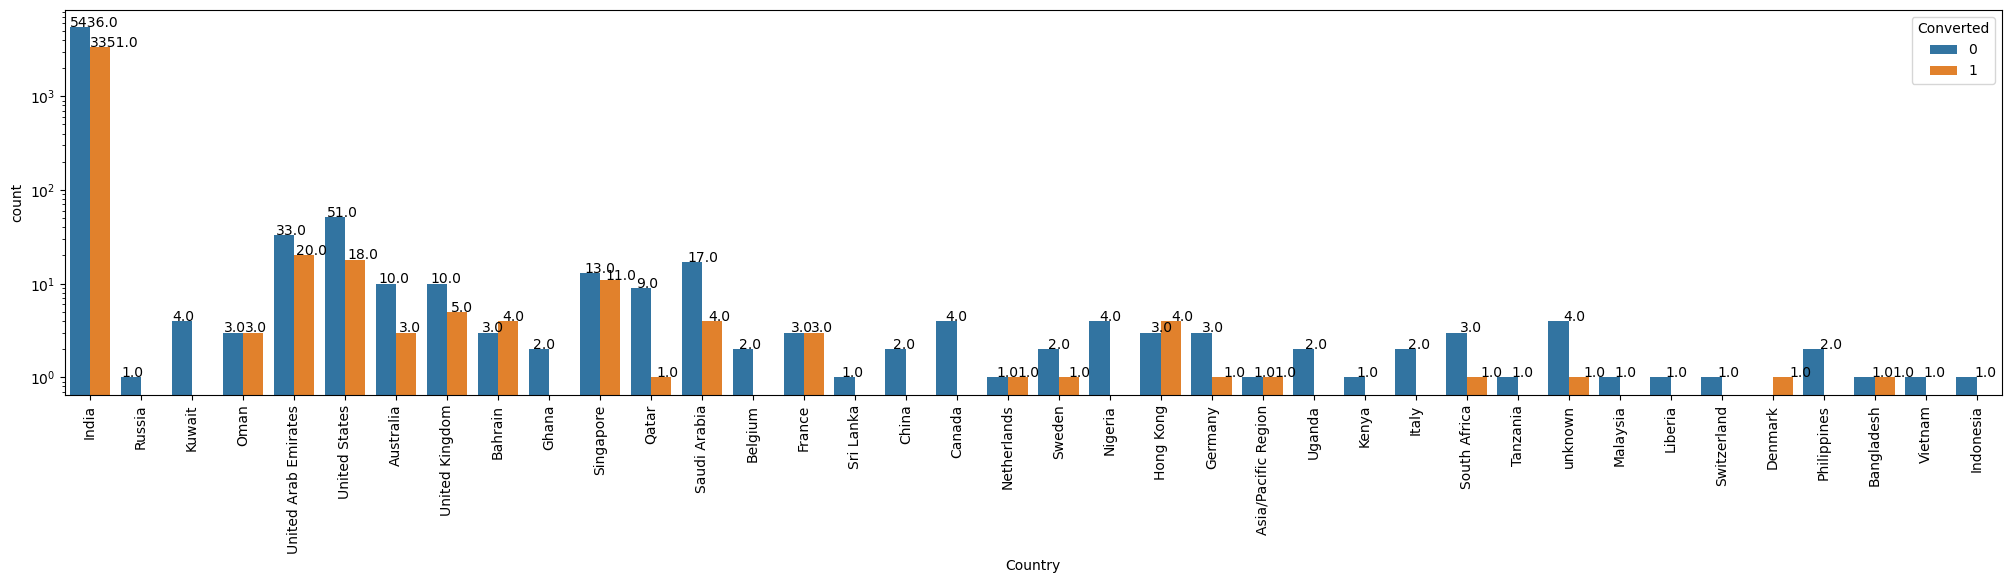

In [153]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Country", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Most values are 'India' , we can tell core business is coming from India market
- They have potential to make business from US, Middle East & Europe

In [155]:
leads['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [156]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Other'], 'Other_Occupation')

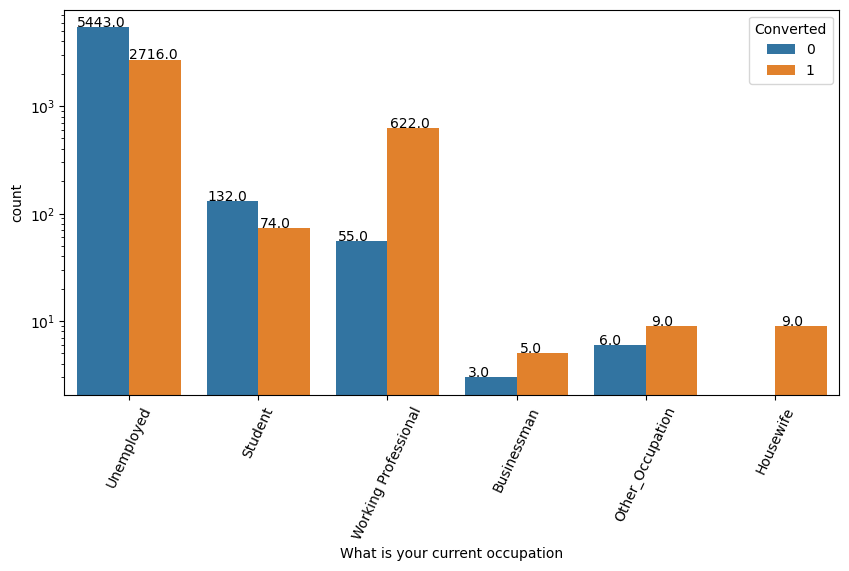

In [160]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 65)
ax.set_yscale('log')
plt.show()

In [161]:
leads['Specialization'].describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.


In [165]:
leads.shape

(9074, 27)

In [167]:
leads= leads.drop(['What matters most to you in choosing a course','Search',
                  'Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview','Country'],axis=1)

In [169]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activity    

- Total Visits & Page Views per Vist are higly correlated with correlation of .77


In [172]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

In [174]:
print(leads['Last Activity'].value_counts())
print(leads['Last Notable Activity'].value_counts())

Last Activity
Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other_Activity                 42
Name: count, dtype: int64
Last Notable Activity
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Rec

In [176]:
#Values under 'Last Activity' are covered by values under 'Last Notable Activity'. Either of these can be dropped. 
leads.drop(['Last Notable Activity'], axis=1, inplace = True)

In [182]:
#number of columns and rows retained
print("Original Columns {} % Retained".format(round((100* len(leads.columns)/len(leads_dub.columns)),2)))
print("Original Rows {} % Retained".format(round((len(leads)*100)/len(leads_dub),2)))

Original Columns 40.0 % Retained
Original Rows 98.2 % Retained


### Converting some binary variables (Yes/No) to 1/0

In [187]:
varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai


## Data Preparation

In [193]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City']], drop_first=True)
dummy1 = dummy1.astype(int)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [195]:
# Adding the results to the master dataframe
leads= pd.concat([leads, dummy1], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [199]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                  'What is your current occupation','City'], axis = 1)

leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [201]:
leads.shape

(9074, 55)

In [205]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

In [207]:
X.shape

(9074, 54)

In [209]:
y = leads['Converted']

In [211]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=333)

In [214]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,4.0,346,4.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,0,0,10.0,165,5.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,0,0,4.0,639,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,0,0,6.0,385,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,0,0,2.0,450,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [216]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1461,0,0,5.0,71,5.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7926,0,0,4.0,233,1.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1909,0,0,5.0,431,2.50,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8971,0,0,4.0,1776,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5310,0,0,4.0,101,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [218]:
X_train.shape

(7259, 54)

In [220]:
X_test.shape

(1815, 54)

In [222]:
y_train.head()

9190    0
8604    0
2916    0
189     1
3037    0
Name: Converted, dtype: int64

In [224]:
y_test.head()

1461    0
7926    0
1909    0
8971    1
5310    0
Name: Converted, dtype: int64

In [226]:
y_train.shape

(7259,)

In [228]:
y_test.shape

(1815,)

## Feature Scaling

In [231]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,0.300780,-0.255196,0.785803,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,0,0,2.467531,-0.587537,1.262497,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,0,0,0.300780,0.282792,0.785803,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,0,0,1.023031,-0.183587,1.739191,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,0,0,-0.421470,-0.064238,-0.167585,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [235]:
# Checking the Converted Rate
Converted = round((sum(leads['Converted'])/len(leads['Converted'].index))*100,2)
print("We have almost {} %  Converted rate after successful data manipulation".format(Converted))

We have almost 37.86 %  Converted rate after successful data manipulation


## Model Building 

In [239]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7204
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2959.0
Date:                Mon, 17 Mar 2025   Deviance:                       5917.9
Time:                        18:54:32   Pearson chi2:                 7.51e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4010
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2939      1.083     -0.271      0.786      -2.417       1.829
Do Not Email                                            -1.2588      0.203     -6.193      0.000      -1.657      -0.860
Do Not Call                                             21.5149   3.09e+04      0.001      0.999   -6.05e+04    6.05e+04
TotalVisits                                              0.3327      0.052      6.356      0.000       0.230       0.435
Total Time Spent on Website                              1.1042      0.038     28.953      0.000       1.029       1.179
Page Views Per Visit                                    -0.2595      0.053     -4.921      0.000      -0.363      -0.156
Lead Origin_Landing Page Submission                     -0.9532      0.128     -7.421      0.000      -1.205      -0.701
Lead Origin_Lead Add Form                                1.6998      0.960      1.771      0.077      -0.181       3.581
Lead Origin_Lead Import                                 21.8911   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.2299   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.3176      0.090      3.524      0.000       0.141       0.494
Lead Source_Olark Chat                                   1.4425      0.149      9.665      0.000       1.150       1.735
Lead Source_Organic Search                               0.2058      0.120      1.709      0.087      -0.030       0.442
Lead Source_Others                                       0.7157      0.650      1.101      0.271      -0.558       1.989
Lead Source_Reference                                    2.0181      0.981      2.058      0.040       0.096       3.940
Lead Source_Referral Sites                              -0.1713      0.328     -0.522      0.602      -0.814       0.472
Lead Source_Welingak Website                             5.3185      1.398      3.805      0.000       2.579       8.058
Last Activity_Email Bounced                              0.1917      0.418      0.458      0.647      -0.628       1.011
Last Activity_Email Link Clicked                         0.7323      0.276      2.650      0.008       0.191       1.274
Last Activity_Email Opened                               1.0439      0.204      5.124      0.000       0.645       1.443
Last Activity_Form Submitted on Website                  0.4383      0.359      1.221      0.222      -0.265       1.142
Last Activity_Olark Chat Conversation                   -0.6864      0.257     -2.672      0.008      -1.190      -0.183
Last Activity_Other_Activity                             2

## Feature Selection Using RFE

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=18)

# Fit the RFE model on training data
rfe = rfe.fit(X_train, y_train)

In [252]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 19),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 34),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 15),
 ('Last Activity_SMS Sent', True, 1),
 (

In [254]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [256]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Special

### Assessing the model with StatsModels

In [259]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7240
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3007.6
Date:                Mon, 17 Mar 2025   Deviance:                       6015.3
Time:                        18:58:52   Pearson chi2:                 7.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3929
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0997      0.568      0.175      0.861      -1.014       1.214
Do Not Email                                            -1.3886      0.176     -7.870      0.000      -1.734      -1.043
Total Time Spent on Website                              1.1067      0.037     29.547      0.000       1.033       1.180
Lead Origin_Landing Page Submission                     -1.1085      0.119     -9.337      0.000      -1.341      -0.876
Lead Origin_Lead Add Form                                1.9403      0.845      2.297      0.022       0.285       3.596
Lead Source_Olark Chat                                   1.1113      0.114      9.718      0.000       0.887       1.335
Lead Source_Reference                                    1.4356      0.866      1.657      0.097      -0.262       3.133
Lead Source_Welingak Website                             4.7482      1.318      3.602      0.000       2.164       7.332
Last Activity_Email Opened                               0.6084      0.100      6.076      0.000       0.412       0.805
Last Activity_Olark Chat Conversation                   -1.0889      0.182     -5.986      0.000      -1.445      -0.732
Last Activity_Other_Activity                             2.3913      0.489      4.889      0.000       1.433       3.350
Last Activity_SMS Sent                                   1.8097      0.102     17.710      0.000       1.609       2.010
Last Activity_Unreachable                                0.6764      0.323      2.094      0.036       0.043       1.309
Last Activity_Unsubscribed                               1.3414      0.481      2.789      0.005       0.399       2.284
Specialization_Others                                   -1.1689      0.115    -10.145      0.000      -1.395      -0.943
What is your current occupation_Housewife               21.9842   1.51e+04      0.001      0.999   -2.95e+04    2.96e+04
What is your current occupation_Student                 -0.7499      0.602     -1.246      0.213      -1.929       0.430
What is your current occupation_Unemployed              -0.9671      0.561     -1.723      0.085      -2.067       0.133
What is your current occupation_Working Professional     1.7322      0.587      2.950      0.003       0.581       2.883
========================================================================================================================
"""

## VIF

In [262]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [266]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,54.20
5,Lead Source_Reference,42.22
16,What is your current occupation_Unemployed,15.45
6,Lead Source_Welingak Website,12.87
2,Lead Origin_Landing Page Submission,7.22
13,Specialization_Others,4.60
7,Last Activity_Email Opened,3.31
10,Last Activity_SMS Sent,2.79
4,Lead Source_Olark Chat,2.37
17,What is your current occupation_Working Professional,2.09


- due to high p value 'What is your current occupation_Housewife' is dropped 

In [269]:
col1 = col.drop('What is your current occupation_Housewife',1)

In [271]:
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [273]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7241
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3010.2
Date:                Mon, 17 Mar 2025   Deviance:                       6020.3
Time:                        19:00:53   Pearson chi2:                 7.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3925
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5776      0.527      1.097      0.273      -0.455       1.610
Do Not Email                                            -1.3911      0.177     -7.878      0.000      -1.737      -1.045
Total Time Spent on Website                              1.1055      0.037     29.529      0.000       1.032       1.179
Lead Origin_Landing Page Submission                     -1.1017      0.119     -9.287      0.000      -1.334      -0.869
Lead Origin_Lead Add Form                                1.9426      0.845      2.300      0.021       0.287       3.598
Lead Source_Olark Chat                                   1.1106      0.114      9.712      0.000       0.886       1.335
Lead Source_Reference                                    1.4382      0.866      1.661      0.097      -0.259       3.135
Lead Source_Welingak Website                             4.7460      1.318      3.600      0.000       2.162       7.330
Last Activity_Email Opened                               0.6122      0.100      6.117      0.000       0.416       0.808
Last Activity_Olark Chat Conversation                   -1.0906      0.182     -5.990      0.000      -1.447      -0.734
Last Activity_Other_Activity                             2.3934      0.489      4.894      0.000       1.435       3.352
Last Activity_SMS Sent                                   1.8115      0.102     17.728      0.000       1.611       2.012
Last Activity_Unreachable                                0.6738      0.324      2.082      0.037       0.039       1.308
Last Activity_Unsubscribed                               1.3463      0.481      2.800      0.005       0.404       2.289
Specialization_Others                                   -1.1639      0.115    -10.106      0.000      -1.390      -0.938
What is your current occupation_Student                 -1.2353      0.561     -2.201      0.028      -2.335      -0.136
What is your current occupation_Unemployed              -1.4525      0.518     -2.806      0.005      -2.467      -0.438
What is your current occupation_Working Professional     1.2466      0.545      2.286      0.022       0.178       2.316
========================================================================================================================
"""

In [275]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,54.20
5,Lead Source_Reference,42.21
15,What is your current occupation_Unemployed,15.29
6,Lead Source_Welingak Website,12.87
2,Lead Origin_Landing Page Submission,7.17
13,Specialization_Others,4.59
7,Last Activity_Email Opened,3.29
10,Last Activity_SMS Sent,2.78
4,Lead Source_Olark Chat,2.37
16,What is your current occupation_Working Professional,2.07


- due to High p value & High VIF 'Lead Source_Reference' can be dropped

In [278]:
col1 = col1.drop('Lead Source_Reference',1)

In [280]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3011.3
Date:                Mon, 17 Mar 2025   Deviance:                       6022.6
Time:                        19:02:03   Pearson chi2:                 7.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3923
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5785      0.526      1.099      0.272      -0.453       1.610
Do Not Email                                            -1.3882      0.176     -7.872      0.000      -1.734      -1.043
Total Time Spent on Website                              1.1049      0.037     29.510      0.000       1.032       1.178
Lead Origin_Landing Page Submission                     -1.0999      0.119     -9.276      0.000      -1.332      -0.867
Lead Origin_Lead Add Form                                3.3227      0.221     15.054      0.000       2.890       3.755
Lead Source_Olark Chat                                   1.1082      0.114      9.686      0.000       0.884       1.332
Lead Source_Welingak Website                             3.3633      1.034      3.253      0.001       1.337       5.390
Last Activity_Email Opened                               0.6121      0.100      6.116      0.000       0.416       0.808
Last Activity_Olark Chat Conversation                   -1.0897      0.182     -5.987      0.000      -1.446      -0.733
Last Activity_Other_Activity                             2.3933      0.489      4.894      0.000       1.435       3.352
Last Activity_SMS Sent                                   1.8114      0.102     17.731      0.000       1.611       2.012
Last Activity_Unreachable                                0.6755      0.323      2.089      0.037       0.042       1.309
Last Activity_Unsubscribed                               1.3438      0.481      2.795      0.005       0.402       2.286
Specialization_Others                                   -1.1605      0.115    -10.083      0.000      -1.386      -0.935
What is your current occupation_Student                 -1.2349      0.561     -2.203      0.028      -2.334      -0.136
What is your current occupation_Unemployed              -1.4553      0.517     -2.814      0.005      -2.469      -0.442
What is your current occupation_Working Professional     1.2454      0.545      2.285      0.022       0.177       2.313
========================================================================================================================
"""

In [282]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,15.29
2,Lead Origin_Landing Page Submission,7.17
12,Specialization_Others,4.59
6,Last Activity_Email Opened,3.29
9,Last Activity_SMS Sent,2.78
4,Lead Source_Olark Chat,2.37
15,What is your current occupation_Working Professional,2.07
3,Lead Origin_Lead Add Form,1.98
7,Last Activity_Olark Chat Conversation,1.94
5,Lead Source_Welingak Website,1.37


- due to high p value 'What is your current occupation_Unemployed' is dropped

In [285]:
col1 = col1.drop('What is your current occupation_Unemployed',1)

In [287]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.5
Date:                Mon, 17 Mar 2025   Deviance:                       6031.0
Time:                        19:03:32   Pearson chi2:                 7.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3916
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8499      0.136     -6.241      0.000      -1.117      -0.583
Do Not Email                                            -1.3823      0.176     -7.853      0.000      -1.727      -1.037
Total Time Spent on Website                              1.1057      0.037     29.544      0.000       1.032       1.179
Lead Origin_Landing Page Submission                     -1.1180      0.118     -9.443      0.000      -1.350      -0.886
Lead Origin_Lead Add Form                                3.3255      0.221     15.078      0.000       2.893       3.758
Lead Source_Olark Chat                                   1.1048      0.114      9.661      0.000       0.881       1.329
Lead Source_Welingak Website                             3.3567      1.034      3.247      0.001       1.330       5.383
Last Activity_Email Opened                               0.6128      0.100      6.130      0.000       0.417       0.809
Last Activity_Olark Chat Conversation                   -1.0813      0.182     -5.954      0.000      -1.437      -0.725
Last Activity_Other_Activity                             2.3854      0.489      4.878      0.000       1.427       3.344
Last Activity_SMS Sent                                   1.8038      0.102     17.678      0.000       1.604       2.004
Last Activity_Unreachable                                0.6855      0.321      2.137      0.033       0.057       1.314
Last Activity_Unsubscribed                               1.3294      0.481      2.765      0.006       0.387       2.272
Specialization_Others                                   -1.1829      0.115    -10.298      0.000      -1.408      -0.958
What is your current occupation_Student                  0.2112      0.223      0.945      0.345      -0.227       0.649
What is your current occupation_Working Professional     2.6906      0.182     14.774      0.000       2.334       3.047
========================================================================================================================
"""

In [289]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.82
12,Specialization_Others,2.56
6,Last Activity_Email Opened,2.52
9,Last Activity_SMS Sent,2.27
4,Lead Source_Olark Chat,2.22
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.70
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


- due to high p value 'What is your current occupation_Student' is dropped

In [295]:
col1 = col1.drop('What is your current occupation_Student',1)

In [297]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.9
Date:                Mon, 17 Mar 2025   Deviance:                       6031.9
Time:                        19:04:48   Pearson chi2:                 7.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3916
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8442      0.136     -6.206      0.000      -1.111      -0.578
Do Not Email                                            -1.3833      0.176     -7.855      0.000      -1.728      -1.038
Total Time Spent on Website                              1.1062      0.037     29.558      0.000       1.033       1.180
Lead Origin_Landing Page Submission                     -1.1180      0.118     -9.440      0.000      -1.350      -0.886
Lead Origin_Lead Add Form                                3.3319      0.220     15.117      0.000       2.900       3.764
Lead Source_Olark Chat                                   1.1073      0.114      9.685      0.000       0.883       1.331
Lead Source_Welingak Website                             3.3478      1.034      3.239      0.001       1.322       5.374
Last Activity_Email Opened                               0.6128      0.100      6.129      0.000       0.417       0.809
Last Activity_Olark Chat Conversation                   -1.0796      0.182     -5.945      0.000      -1.435      -0.724
Last Activity_Other_Activity                             2.3802      0.489      4.868      0.000       1.422       3.339
Last Activity_SMS Sent                                   1.8000      0.102     17.657      0.000       1.600       2.000
Last Activity_Unreachable                                0.6798      0.321      2.120      0.034       0.051       1.308
Last Activity_Unsubscribed                               1.3255      0.481      2.756      0.006       0.383       2.268
Specialization_Others                                   -1.1843      0.115    -10.303      0.000      -1.410      -0.959
What is your current occupation_Working Professional     2.6855      0.182     14.753      0.000       2.329       3.042
========================================================================================================================
"""

In [299]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.81
12,Specialization_Others,2.55
6,Last Activity_Email Opened,2.52
9,Last Activity_SMS Sent,2.27
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.70
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


- Here we can accept the 0.001 and 'Last Activity_Unreachable' is dropped due to high p value

In [302]:
col1 = col1.drop('Last Activity_Unreachable',1)

In [304]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7245
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.1
Date:                Mon, 17 Mar 2025   Deviance:                       6036.1
Time:                        19:06:32   Pearson chi2:                 7.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3912
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7978      0.134     -5.963      0.000      -1.060      -0.536
Do Not Email                                            -1.3985      0.176     -7.959      0.000      -1.743      -1.054
Total Time Spent on Website                              1.1047      0.037     29.558      0.000       1.031       1.178
Lead Origin_Landing Page Submission                     -1.1185      0.118     -9.447      0.000      -1.351      -0.886
Lead Origin_Lead Add Form                                3.3358      0.220     15.140      0.000       2.904       3.768
Lead Source_Olark Chat                                   1.1052      0.114      9.671      0.000       0.881       1.329
Lead Source_Welingak Website                             3.3380      1.034      3.230      0.001       1.312       5.364
Last Activity_Email Opened                               0.5683      0.097      5.851      0.000       0.378       0.759
Last Activity_Olark Chat Conversation                   -1.1227      0.180     -6.233      0.000      -1.476      -0.770
Last Activity_Other_Activity                             2.3357      0.488      4.783      0.000       1.379       3.293
Last Activity_SMS Sent                                   1.7561      0.099     17.706      0.000       1.562       1.951
Last Activity_Unsubscribed                               1.2957      0.480      2.698      0.007       0.354       2.237
Specialization_Others                                   -1.1868      0.115    -10.327      0.000      -1.412      -0.962
What is your current occupation_Working Professional     2.6835      0.182     14.747      0.000       2.327       3.040
========================================================================================================================
"""

In [306]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.73
11,Specialization_Others,2.52
6,Last Activity_Email Opened,2.47
9,Last Activity_SMS Sent,2.23
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.76
3,Lead Origin_Lead Add Form,1.69
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


- Here we can accept the 0.001 and 'Last Activity_Unsubscribed' is dropped due to high p value

In [311]:
col1 = col1.drop('Last Activity_Unsubscribed',1)

In [313]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7246
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.2
Date:                Mon, 17 Mar 2025   Deviance:                       6042.4
Time:                        19:07:31   Pearson chi2:                 7.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3907
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7790      0.133     -5.842      0.000      -1.040      -0.518
Do Not Email                                            -1.2825      0.166     -7.711      0.000      -1.608      -0.957
Total Time Spent on Website                              1.1052      0.037     29.582      0.000       1.032       1.178
Lead Origin_Landing Page Submission                     -1.1198      0.118     -9.460      0.000      -1.352      -0.888
Lead Origin_Lead Add Form                                3.3290      0.220     15.126      0.000       2.898       3.760
Lead Source_Olark Chat                                   1.1082      0.114      9.700      0.000       0.884       1.332
Lead Source_Welingak Website                             3.3207      1.033      3.215      0.001       1.296       5.345
Last Activity_Email Opened                               0.5501      0.097      5.698      0.000       0.361       0.739
Last Activity_Olark Chat Conversation                   -1.1434      0.180     -6.362      0.000      -1.496      -0.791
Last Activity_Other_Activity                             2.3143      0.487      4.747      0.000       1.359       3.270
Last Activity_SMS Sent                                   1.7315      0.098     17.617      0.000       1.539       1.924
Specialization_Others                                   -1.1882      0.115    -10.345      0.000      -1.413      -0.963
What is your current occupation_Working Professional     2.6853      0.182     14.778      0.000       2.329       3.041
========================================================================================================================
"""

In [315]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9190    0.389505
8604    0.306466
2916    0.536234
189     0.102463
3037    0.440694
103     0.169623
2533    0.801114
4340    0.093295
1383    0.215318
6428    0.215318
dtype: float64

In [317]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38950531, 0.30646585, 0.53623408, 0.10246346, 0.4406941 ,
       0.16962343, 0.80111378, 0.0932948 , 0.21531798, 0.21531798])

In [319]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.389505
1,0,0.306466
2,0,0.536234
3,1,0.102463
4,0,0.440694


- Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [322]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.389505,0
1,0,0.306466,0
2,0,0.536234,1
3,1,0.102463,0
4,0,0.440694,0


In [324]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[4022  481]
 [ 935 1821]]


In [326]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8049318087890894


In [328]:
#checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.72
10,Specialization_Others,2.52
6,Last Activity_Email Opened,2.47
9,Last Activity_SMS Sent,2.22
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.76
3,Lead Origin_Lead Add Form,1.69
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.20


### Metrics beyond simply accuracy

In [331]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [333]:
# Let's see the sensitivity of our model
TP / float(TP+FN)

0.6607402031930334

In [335]:
# Let us calculate specificity
TN / float(TN+FP)

0.8931823228958472

In [337]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.10681767710415278


In [341]:
# positive predictive value 
print (TP / float(TP+FP))

0.7910512597741095


In [343]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8113778495057494


## Plotting the ROC Curve

In [346]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [348]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )

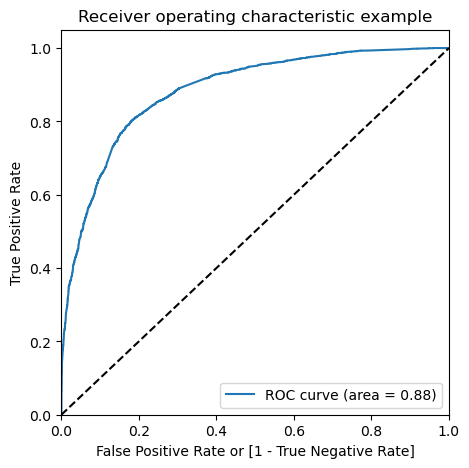

In [350]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [353]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0


In [355]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379667  1.000000  0.000000
0.1   0.1  0.603251  0.972787  0.377082
0.2   0.2  0.732195  0.920900  0.616700
0.3   0.3  0.796666  0.839260  0.770597
0.4   0.4  0.814713  0.777576  0.837442
0.5   0.5  0.804932  0.660740  0.893182
0.6   0.6  0.794049  0.589623  0.919165
0.7   0.7  0.778620  0.507620  0.944481
0.8   0.8  0.755614  0.405660  0.969798
0.9   0.9  0.705469  0.239115  0.990895


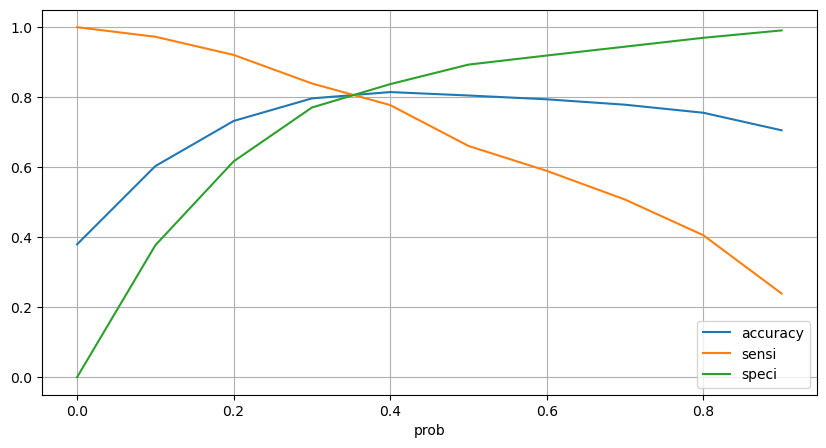

In [357]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize = (10,5))
plt.grid(True)
plt.show()

In [359]:
# From the curve above, 0.34 is the optimum point to take it as a cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0,1


### Assigning Lead Score

In [362]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0,1,39
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0,0,31
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0,1,54
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0,0,10
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0,1,44


In [364]:
# Let's check the overall accuracy.
trainaccuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
trainaccuracy

0.8065849290535887

In [366]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3607,  896],
       [ 508, 2248]], dtype=int64)

In [368]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [370]:
# Let's see the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.8156748911465893

In [372]:
# Let us calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity

0.8010215411947591

In [374]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.19897845880524095


In [376]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7150127226463104


In [378]:
# Negative predictive value
print(TN / float(TN+ FN))

0.8765492102065614


### Precision and Recall

In [381]:
from sklearn.metrics import precision_score, recall_score

precision= precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
precision

0.7910512597741095

In [383]:
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall

0.6607402031930334

In [385]:
trainF1_score= 2 * (precision * recall) / (precision + recall)
trainF1_score

0.7200474495848161

### Precision and recall tradeoff

In [388]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

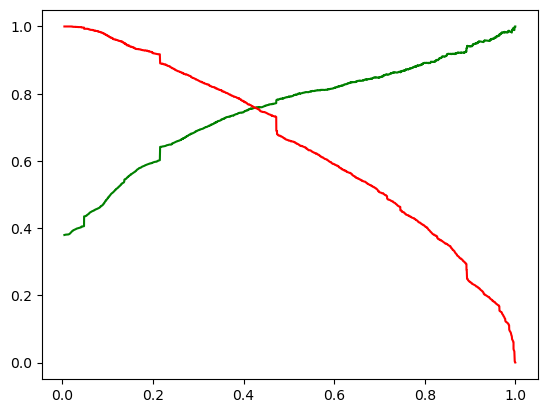

In [390]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [396]:
X_test[['TotalVisits','Total Time Spent on Website',
'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,0.300780,-0.255196,0.785803,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,0,0,2.467531,-0.587537,1.262497,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,0,0,0.300780,0.282792,0.785803,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,0,0,1.023031,-0.183587,1.739191,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,0,0,-0.421470,-0.064238,-0.167585,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [398]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional
1461,0,-0.892138,0,0,0,0,0,1,0,0,1,0
7926,0,-0.892137,0,0,0,0,0,1,0,0,1,0
1909,0,-0.892135,1,0,0,0,1,0,0,0,0,0
8971,0,-0.892127,1,0,0,0,1,0,0,0,0,0
5310,0,-0.892137,1,0,0,0,0,0,0,1,0,0


In [400]:
X_test_sm = sm.add_constant(X_test)

In [402]:
y_test_pred = res.predict(X_test_sm)

In [404]:
y_test_pred[:10]

1461    0.016357
7926    0.016357
1909    0.088289
8971    0.088290
5310    0.239880
4774    0.215012
2084    0.215012
6351    0.141827
335     0.892260
8202    0.052910
dtype: float64

In [406]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [408]:
# Let's see the head
y_pred_1.head()

,0
1461,0.016357
7926,0.016357
1909,0.088289
8971,0.088290
5310,0.239880


In [410]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [412]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [414]:
y_pred_final.head()

,Converted,0
1461,0,0.016357
7926,0,0.016357
1909,0,0.088289
8971,1,0.088290
5310,0,0.239880


In [416]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [418]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_prob
1461,0,0.016357
7926,0,0.016357
1909,0,0.088289
8971,1,0.088290
5310,0,0.239880


In [420]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [422]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [424]:
Lead_Score=y_pred_final.copy()
y_pred_final.head()

,Converted,Converted_prob,final_predicted,Lead_Score
1461,0,0.016357,0,2
7926,0,0.016357,0,2
1909,0,0.088289,0,9
8971,1,0.088290,0,9
5310,0,0.239880,0,24


In [428]:
Lead_Score.reset_index(level=0, inplace=True)
Lead_Score.drop(['Converted', 'Converted_prob', 'final_predicted'], axis=1, inplace = True)
Lead_Score.head()

,level_0,index,Lead_Score
0,0,1461,2
1,1,7926,2
2,2,1909,9
3,3,8971,9
4,4,5310,24


In [432]:
Lead=leads_dub.copy()
Lead.reset_index(level=0, inplace=True)
Lead.drop(['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1, inplace = True)
Lead.head()

,index,Prospect ID,Lead Number
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,4,3256f628-e534-4826-9d63-4a8b88782852,660681


In [436]:
Lead_Score=pd.merge(Lead,Lead_Score,on='index')
Lead_Score.drop(['index'], axis=1, inplace = True)
Lead_Score.head()

,Prospect ID_x,Lead Number_x,Prospect ID_y,Lead Number_y,level_0,Lead_Score
0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,660,5
1,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,1765,5
2,af465dfc-7204-4130-9e05-33231863c4b5,660616,af465dfc-7204-4130-9e05-33231863c4b5,660616,1001,23
3,8bf76a52-2478-476b-8618-1688e07874ad,660562,8bf76a52-2478-476b-8618-1688e07874ad,660562,1429,23
4,88867067-3750-4753-8d33-1c7d1db53b5e,660558,88867067-3750-4753-8d33-1c7d1db53b5e,660558,1252,9


- As per the business, they a model to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted

In [439]:
Lead_Score.sort_values(["Lead_Score"], ascending = False,inplace=True)
Lead_Score.head()

,Prospect ID_x,Lead Number_x,Prospect ID_y,Lead Number_y,level_0,Lead_Score
244,542a0891-2e52-40ba-ab42-e468b9636322,646544,542a0891-2e52-40ba-ab42-e468b9636322,646544,1041,100
1594,8b271362-1b47-4bc1-a74b-a5b1609aeca9,587944,8b271362-1b47-4bc1-a74b-a5b1609aeca9,587944,1004,100
1435,95d1590f-7c47-4f40-9806-388f4472d3a4,593208,95d1590f-7c47-4f40-9806-388f4472d3a4,593208,184,100
1590,a6f8ee6c-73f0-4beb-87e0-479e0a615a53,588001,a6f8ee6c-73f0-4beb-87e0-479e0a615a53,588001,1664,100
1595,273692bc-01b6-4f3b-80df-7a0e83b366ab,587918,273692bc-01b6-4f3b-80df-7a0e83b366ab,587918,477,100


In [441]:
# Let's check the overall accuracy.
testaccuracy= metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
testaccuracy

0.7449035812672177

In [443]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1092,   44],
       [ 419,  260]], dtype=int64)

In [445]:
# Let's see the sensitivity of our lmodel
testsensitivity=TP / float(TP+FN)
testsensitivity

0.8156748911465893

In [447]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

0.8010215411947591

In [449]:
precision= precision_score(y_pred_final.Converted , y_pred_final.final_predicted)
precision

0.8552631578947368

In [451]:
recall=recall_score(y_pred_final.Converted , y_pred_final.final_predicted)
recall

0.38291605301914583

In [453]:
testF1_score= 2 * (precision * recall) / (precision + recall)
testF1_score

0.5289928789420142

## Final Observation:

- With insights from data, Team able to design a model to share lead Score , whic will help sales team to target hot leads & convert them into Customers. Table UI is made simple to make sure teams works efficenctly & improves the sales.

In [457]:
Lead_Score

,Prospect ID_x,Lead Number_x,Prospect ID_y,Lead Number_y,level_0,Lead_Score
244,542a0891-2e52-40ba-ab42-e468b9636322,646544,542a0891-2e52-40ba-ab42-e468b9636322,646544,1041,100
1594,8b271362-1b47-4bc1-a74b-a5b1609aeca9,587944,8b271362-1b47-4bc1-a74b-a5b1609aeca9,587944,1004,100
1435,95d1590f-7c47-4f40-9806-388f4472d3a4,593208,95d1590f-7c47-4f40-9806-388f4472d3a4,593208,184,100
1590,a6f8ee6c-73f0-4beb-87e0-479e0a615a53,588001,a6f8ee6c-73f0-4beb-87e0-479e0a615a53,588001,1664,100
1595,273692bc-01b6-4f3b-80df-7a0e83b366ab,587918,273692bc-01b6-4f3b-80df-7a0e83b366ab,587918,477,100
593,40e31092-330b-43dc-a99c-ee8e6e4f987b,631313,40e31092-330b-43dc-a99c-ee8e6e4f987b,631313,739,100
1132,1e4e458f-44a9-410e-9dec-4dc6797c1ade,605310,1e4e458f-44a9-410e-9dec-4dc6797c1ade,605310,1165,100
1199,804e0cfb-559d-4a63-a635-573f7cfdf441,602459,804e0cfb-559d-4a63-a635-573f7cfdf441,602459,306,100
614,2e1ff385-d334-420f-a530-8074e95032b2,630427,2e1ff385-d334-420f-a530-8074e95032b2,630427,1129,100
1591,8d53c875-1ce5-4288-a539-07cc01450f7f,588000,8d53c875-1ce5-4288-a539-07cc01450f7f,588000,1411,100


### Model Evaluation Metrics

In [460]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Train Data F1 Score    :{}  ".format(round((trainF1_score),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))
print("Test Data F1 Score     :{}  ".format(round((testF1_score),2)))

Train Data Accuracy    :80.66 %
Train Data Sensitivity :81.57 %
Train Data Specificity :80.1 %
Train Data F1 Score    :0.72  
Test Data Accuracy     :74.49 %
Test Data Sensitivity  :81.57 %
Test Data Specificity  :80.1 %
Test Data F1 Score     :0.53  


In [464]:
from sklearn.metrics import classification_report
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))
print (classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4503
           1       0.72      0.82      0.76      2756

    accuracy                           0.81      7259
   macro avg       0.80      0.81      0.80      7259
weighted avg       0.82      0.81      0.81      7259

              precision    recall  f1-score   support

           0       0.72      0.96      0.83      1136
           1       0.86      0.38      0.53       679

    accuracy                           0.74      1815
   macro avg       0.79      0.67      0.68      1815
weighted avg       0.77      0.74      0.71      1815

